# Exemple d'utilisation de l'api de l'application

## Importer/Lire les données d'un fichier

Pour utiliser un fichier, il faut d'abord le lire et extraire les données qui nous intéressent (ici, les coordinnées des points, ainsi que les informations sur les faces de l'objet si disponible).
Pour ce faire on passe par une classe qui abstrait le fichier, et qui permet de récupérer les données sous forme d'une classe nommée `ScannedObject`.

Cette classe possède la methode `from_file` qui permet de lire un fichier stl,obj ou xyz et de le convertir en objet `ScannedObject`.


In [1]:
from utils.files.input import ScannedObject
obj = ScannedObject.from_file('exemple_file/exemple.obj')

Une instance de `ScannedObject` uniquement les données qui nous intéressent, à savoir les points et les faces de l'objet, toute autres données sont ignorées.
Nous pouvons donc visualiser les données en utilisant les methodes `get_vertices` et `get_faces` qui renvoient respectivement les points et les faces de l'objet.

In [2]:
vertices = obj.get_vertices()
print(vertices[:5])
faces = obj.get_faces()
print(faces[:5])

[[ -15.27013 -102.8562   -21.04008]
 [ -15.05591 -102.8562   -21.19151]
 [ -15.05591 -102.9366   -21.04008]
 [ -12.83076  -98.88948  -14.36465]
 [ -12.83076  -98.81498  -14.64281]]
[[ 0  1  2]
 [ 3  4  5]
 [ 5  6  3]
 [ 7  8  9]
 [ 2  1 10]]


Comme beaucoup des autres methode de la classe `ScannedObject`, ces deux methodes possèdent des paramètres optionnels qui permettent d'alterer les données renvoyées.
Par exemple, la methode `get_vertices` possède un paramètre `sort` qui permet de trier les points par ordre croissant de leur coordonnée z, et la methode `get_faces` possède un paramètre `resolved` qui permet de renvoyer les faces sous forme de liste de points au lieu de liste d'indices de points.

In [3]:
vertices = obj.get_vertices(sort=True)
print(vertices[:2])
faces = obj.get_faces(resolved=True)
print(faces[:2])

[array([  -4.208344, -101.4655  ,  -25.25799 ]), array([  -4.208344, -101.1874  ,  -25.24189 ])]
[[[ -15.27013 -102.8562   -21.04008]
  [ -15.05591 -102.8562   -21.19151]
  [ -15.05591 -102.9366   -21.04008]]

 [[ -12.83076  -98.88948  -14.36465]
  [ -12.83076  -98.81498  -14.64281]
  [ -12.94191  -98.96223  -14.64281]]]


Nous pouvons avoir une visualisation de l'objet 3D via les methodes de rendu3D integrées au programme:

- Via la bibliotheque mathplotlib : La methode la plus simple a manier au niveau du code, cepandant **tres lente** lorsqu'il y a un nombre important de données, pour les visualisation de ce notebook nous utiliserons cette methode
  
- Via la bibliotheque vispy : Methode moin intuitive mais plus performante du fait de l'utilisation d'openGL pour le rendu graphique, c'est la methode utilisé pour les graphes de l'interface graphique du programme

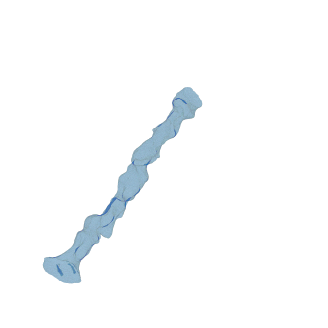

In [4]:
from utils.graph3D.mpl_render import render3D
render3D(obj)

## Alterer les données d'un objet

Une fois que nous avons un objet `ScannedObject`, nous pouvons normaliser les données en utilisant la methode `normalize` qui prend en paramètre le ou les axes sur lesquels normaliser les données.

In [5]:
# On recupere le z le plus petit
min_z = obj.get_vertices(sort=True)[0][2]
print(f"z minimal pre-normalisation :{min_z}")
obj.normalise('z')
min_z = obj.get_vertices(sort=True)[0][2]
print(f"z minimal post-normalisation :{min_z}")

z minimal pre-normalisation :-25.25799
z minimal post-normalisation :0.0


Nous pouvons aussi verticaliser un fichier scanné, pour cela il faut importer la fonction verticalise du module `utils.math.position_manipulation`

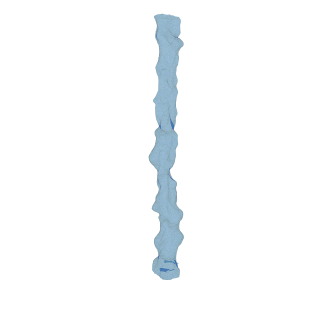

In [6]:
from utils.math.position_manipulation import verticalise
verticalise(obj)
render3D(obj)

## Calculer les indicateurs

Le calcul des indicateurs ce fait par le module `utils.data_processing.data_processing`

In [7]:
from utils.data_processing.data_processing import get_discrete_data, get_advanced_data,get_raw_data

raw_data = get_raw_data(obj, ndigits=3, delta_z=1)
discrete_data = get_discrete_data(obj, ndigits=3, delta_z=1)
morphological_data = get_advanced_data(discrete_data,raw_data)

In [8]:
for key, value in raw_data.items():
    print(f"{key} : [{value[0]},{value[1]},{value[2]},...]")

X (en mm) : [3.517,3.301,3.33,...]
Y (en mm) : [0.468,0.284,0.677,...]
Z (en mm) : [-73.741,-73.731,-73.728,...]
theta (en rad) : [0.877,0.878,0.807,...]
rayon (en mm) : [4.009,3.725,4.009,...]
Xi-Xmoy : [3.082,2.866,2.896,...]
Yi-Ymoy : [2.564,2.379,2.772,...]


In [9]:
for key, value in discrete_data.items():
    print(f"{key} : [{value[0]},{value[1]},{value[2]},...]")

X moy (en mm) : [0.435,0.14,1.368,...]
Y moy (en mm) : [-2.095,-1.837,-3.44,...]
Z moy (en mm) : [-72.991,-71.519,-70.5,...]
Discretisation(en mm) : [1.741,0.998,0.998,...]
Rayon moyen (en mm) : [6.756,8.106,7.596,...]
Rayon ecart type (en mm) : [2.6,2.407,2.762,...]


In [10]:
for key, value in morphological_data.items():
    print(f"{key} : {value}")

Tortuosité : 1.0797297570494615
Volume en mm3 : 13505.551076405092
Surface en mm2 : 5201.0729735920295
<R> : 5.064711656441718
<R²> : 26.302927226993862
σ_<R> : 0.8097193518068154
σ_<R>^tot : 1.4360271048515636
H : 163.44
L : 163.5244273857001
l : 176.5621902528143
MI_l : 0.1598747187862013
MI_p : 0.2341636776566463
R_max : 8.106
MI_mR : 1.6004859802216225
MI_mH : 0.04959618208516887
MI_mR_in : 0.20265
V_scan : 0
R_V_scan : 0.0
S_V_scan : 0.0
Rayon hydraulique R_h : 5.193371115913308
HI : 0.0


Nous pouvons apres enregistrer ces resultats dans un fichier csv par exemple

In [11]:
from utils.files.output import format_data, save_output_file

string = format_data(raw_data,";")
save_output_file("result.csv",string)